In [1]:
import numpy as np
from scipy.integrate import quad
def erf_asy(x):
    a1, a2, a3, a4, a5 = 0.254829592, -0.284496736, 1.421413741, -1.453152027, 1.061405429
    p = 0.3275911
    sign = np.sign(x)  # Element-wise sign function
    x = np.abs(x)
    t = 1 / (1 + p * x)
    y = 1 - (((((a5 * t + a4) * t + a3) * t + a2) * t + a1) * t * np.exp(-x * x))
    return sign * y

def phi(x):
    return 0.5 * (1 + np.erf(x / np.sqrt(2)))

from scipy.special import erfinv

def phi_inv(p):
    return np.sqrt(2) * erfinv(2*p - 1)

# print(erf_asy(0))

***PNS with evidence(Y=y_, X=0)*** 

In [65]:
from scipy.stats import norm
y = 10
y_=6
scale0, scale1 = 5, 9#xm parameter
shape0, shape1 = 5, 5#tail(alpha) parameter

def F_Y1(y,scale1,shape1):
    if(y>=scale1):
        temp=(scale1/y)**shape1
        return 1-temp
    else:
        return 0

def F_Y0(y,scale0,shape0):
    if (y>=scale0):
        temp=(scale0/y)**shape0
        return 1-temp
    else:
        return 0


u0 = F_Y0(y_,scale0,shape0)
u1 = F_Y1(y,scale1,shape1)
a0=norm.ppf(u0)
a1=norm.ppf(u1)
print(u0,u1)
print(a1,':a1')
print(a0,':a0')
print(a0/a1)

0.598122427983539 0.40950999999999993
-0.22880561810695668 :a1
0.24849020980169173 :a0
-1.0860319421244864


In [66]:
norm.ppf(0)

np.float64(-inf)

In [67]:
def f1(y,scale1,shape1):
    if(y>=scale1):
        ans=shape1*scale1**shape1
        ans=ans/(y**(shape1+1))
        return ans
    else:
        return 0

def my_integrand(z, rho, a0):
    den = np.sqrt(2*(1 - rho**2))
    c2=norm.ppf(F_Y1(z,scale1,shape1))
    temp=f1(z,scale1,shape1)/(norm.pdf(c2))
    c1=(c2-rho*a0)/den
    return np.exp(-(c1**2))*temp

def Integrat_quad(a, b, rho, a0):
    f = lambda z: my_integrand(z, rho, a0)
    val ,error= quad(f, a, b,limit=10000)
    return val


def PNS_Y0(y,rho,a0,y_):
    if(y>y_):
        den = np.sqrt((1 - rho**2))*2*np.pi*norm.pdf(a0)
        num=np.exp(-(a0**2)/2)
        num=num*Integrat_quad(y,np.inf,rho,a0)
        return num/den
    else:
        return 0

In [68]:
print(PNS_Y0(y,-0.99999,a0,y_),PNS_Y0(y,0,a0,y_),PNS_Y0(y,0.99999,a0,y_))

5.3860702377424205e-06 0.5904899999999998 1.000000000000006


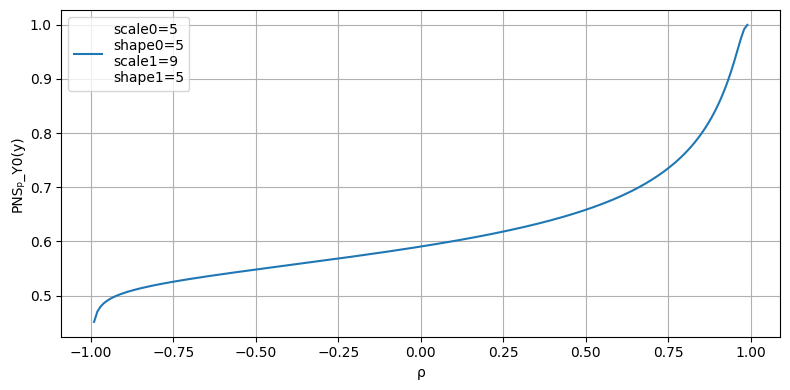

In [69]:
rhos = np.linspace(-0.99, 0.99, 200)

PNS_Y0_vals=[PNS_Y0(y,r,a0,y_) for r in rhos]
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(rhos, PNS_Y0_vals, label=f'scale0={scale0}\nshape0={shape0}\nscale1={scale1}\nshape1={shape1}')

ax.set_xlabel('ρ')
ax.set_ylabel('PNSₚ_Y0(y)')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [70]:
PNS_Y0_vals

[np.float64(0.4514790628227575),
 np.float64(0.47046558746808026),
 np.float64(0.4798647165446416),
 np.float64(0.4860390819194957),
 np.float64(0.49064294110791434),
 np.float64(0.49433195518066064),
 np.float64(0.49742752941902274),
 np.float64(0.5001093687094919),
 np.float64(0.5024874446624501),
 np.float64(0.5046336527256118),
 np.float64(0.5065974333572698),
 np.float64(0.5084141723109613),
 np.float64(0.5101100308832178),
 np.float64(0.5117048768532843),
 np.float64(0.5132141433261267),
 np.float64(0.5146500520800409),
 np.float64(0.516022444404453),
 np.float64(0.517339360848698),
 np.float64(0.5186074554058723),
 np.float64(0.5198322975985352),
 np.float64(0.5210185968775971),
 np.float64(0.5221703720572733),
 np.float64(0.5232910811372602),
 np.float64(0.5243837220973239),
 np.float64(0.5254509120989245),
 np.float64(0.5264949504035242),
 np.float64(0.5275178688576667),
 np.float64(0.5285214727755895),
 np.float64(0.5295073743273851),
 np.float64(0.5304770200209712),
 np.floa

***PNS with evidence(Y=y_, X=1)*** 

In [71]:
from scipy.stats import norm
y = 20
y_=24
scale0, scale1 = 18 ,22#xm parameter
shape0, shape1 = 5, 5#tail(alpha) parameter

def F_Y1(y,scale1,shape1):
    if(y>=scale1):
        temp=(scale1/y)**shape1
        return 1-temp
    else:
        return 0

def F_Y0(y,scale0,shape0):
    if (y>=scale0):
        temp=(scale0/y)**shape0
        return 1-temp
    else:
        return 0


u0 = F_Y0(y,scale0,shape0)
u1 = F_Y1(y_,scale1,shape1)
a0=norm.ppf(u0)
a1=norm.ppf(u1)

print(a1,':a1')
print(a0,':a0')
print(a1/a0)

-0.37784693739047404 :a1
-0.22880561810695668 :a0
1.651388372875735


In [72]:


def f0(y,scale0,shape0):
    if(y>=scale0):
        ans=shape0*scale0**shape0
        ans=ans/(y**(shape0+1))
        return ans
    else:
        return 0

from scipy.integrate import quad
import numpy as np

def my_integrand(z, rho, a1):
    den = np.sqrt(2*(1 - rho**2))
    c2=norm.ppf(F_Y0(z,scale0,shape0))
    temp=f0(z,scale0,shape0)/(norm.pdf(c2))
    c1=(c2-rho*a1)/den
    return np.exp(-(c1**2))*temp

def Integrat_quad(a, b, rho, a1):
    f = lambda z: my_integrand(z, rho, a1)
    val ,error= quad(f, a, b,limit=10000)
    return val


def PNS_Y1(y,rho,a1,y_):
    if(y<y_):
        den = np.sqrt((1 - rho**2))*2*np.pi*norm.pdf(a1)
        num=np.exp(-(a1**2)/2)
        num=num*Integrat_quad(scale0,y,rho,a1)
        return num/den
    else:
        return 0

rhos = np.linspace(-0.99, 0.99, 200)
PNS_Y1_vals=[PNS_Y1(y,r,a1,y_) for r in rhos]



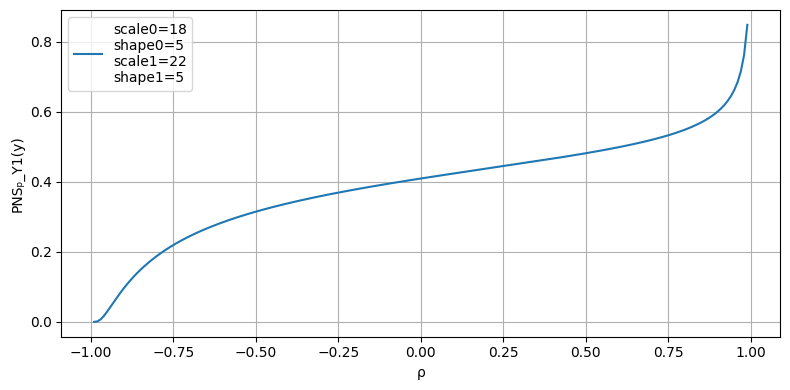

In [73]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(rhos, PNS_Y1_vals, label=f'scale0={scale0}\nshape0={shape0}\nscale1={scale1}\nshape1={shape1}')

ax.set_xlabel('ρ')
ax.set_ylabel('PNSₚ_Y1(y)')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [74]:
print(PNS_Y1(y,-0.999992,a1,y_),PNS_Y1(y,0,a1,y_),PNS_Y1(y,0.99999,a1,y_))

0.0 0.40950999999999993 0.9999999999999879


In [75]:
PNS_Y1_vals

[np.float64(9.614462346540291e-06),
 np.float64(0.0012873754811332302),
 np.float64(0.007083248824847985),
 np.float64(0.01714041052028256),
 np.float64(0.029628569963426082),
 np.float64(0.04313194787652861),
 np.float64(0.05681036174957171),
 np.float64(0.07021027072811138),
 np.float64(0.083104074498212),
 np.float64(0.09539073293854766),
 np.float64(0.10703875488115212),
 np.float64(0.11805409135311526),
 np.float64(0.12846208902434855),
 np.float64(0.13829733814083953),
 np.float64(0.14759797960384266),
 np.float64(0.1564025528529315),
 np.float64(0.1647483024929727),
 np.float64(0.17267032554465586),
 np.float64(0.18020120210774546),
 np.float64(0.1873709009002308),
 np.float64(0.19420683711696915),
 np.float64(0.20073401031243587),
 np.float64(0.2069751799159146),
 np.float64(0.21295105359538502),
 np.float64(0.21868047455601472),
 np.float64(0.22418059997831966),
 np.float64(0.22946706696493466),
 np.float64(0.23455414431900976),
 np.float64(0.23945487002486468),
 np.float64(0.